In [18]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

from __future__ import print_function, division

import numpy as np
import eos_integrate
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("figure", dpi=144)
import scipy.optimize
import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
SMALL_SIZE = 7
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

onecolumn_width = 89/25.4
twocolumn_width = 183/25.4
page_height = 247/25.4
mid1_width = 120/25.4
mid2_width = 136/25.4

golden = (1+np.sqrt(5))/2

In [ ]:
def set_size_ratio(fig, width, ratio=1/golden):
    fig.set_size_inches(width, width*ratio)
    # idea: arrange for the axes to have proportions according to ratio
    

/users/aarchiba/.virtualenvs/triplesystem/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


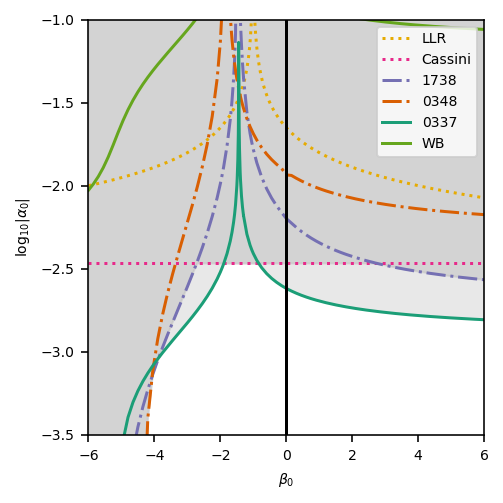

In [75]:
d = pickle.load(open("alpha-beta.pickle","rb"))
colorbrewer_out = """
#1b9e77
#d95f02
#7570b3
#e7298a
#66a61e
#e6ab02
"""
cbout = [c.strip() for c in colorbrewer_out.split() if c.strip()]
colors = dict(zip(sorted(d["alphas"].keys()), cbout))
styles = {
    "LLR": ":",
    "Cassini": ":",
    "1738": "-.",
    "0348": "-.",
    "0337": "-",
    "WB": "-",
}

llr_color = cbout[len(colors)]
llr_label = "LLR"
for a in d["alphas_llr"]:
    plt.plot(d["betas_llr"],np.log10(a),styles["LLR"],color=llr_color,label=llr_label)
    llr_label=None
    
pr_old = np.inf*np.ones_like(d["betas"])
pr_new = np.inf*np.ones_like(d["betas"])

for k in d["alphas"].keys():
    plt.plot(d["betas"], np.log10(np.abs(d["alphas"][k])), 
             styles[k], color=colors[k], label=k)
    pr_new = np.minimum(pr_new, np.abs(d["alphas"][k]))
    if k!="0337":
        pr_old = np.minimum(pr_old, np.abs(d["alphas"][k]))
pr_old = np.maximum(pr_old, 1e-10)
pr_new = np.maximum(pr_new, 1e-10)
plt.fill_between(d["betas"], 10, np.log10(pr_old), 
                 color="darkgray", alpha=0.5) 
plt.fill_between(d["betas"], 10, np.log10(pr_new), 
                 color="lightgray", alpha=0.5) 
plt.axvline(0, color="k")
#plt.axvline(-1.445)
#plt.axvline(-1.440)
plt.xlim(-6,6)
#plt.xlim(-1.46,-1.42)
plt.ylim(-3.5,-1)
plt.legend(loc="upper right")
plt.ylabel(r"$\log_{10}|\alpha_0|$")
plt.xlabel(r"$\beta_0$")
plt.gcf().set_size_inches(onecolumn_width,onecolumn_width)
plt.tight_layout()
plt.savefig("alpha-beta.pdf")